In [1]:
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import sqlite3

In [2]:
# Common vars
test_base_dir = '/mnt/test/pyscipio'
filter_job_dir = 'job_target_magnap_*_query_magnap_oryzae'
filter_result_dir = 'run__q_genes*'
csv_basename = 'prefilter_scipio_results'

In [3]:
# Collect CSV files
# path = os.path.join(test_base_dir, filter_job_dir, '**/%s.csv' % csv_basename)
path = os.path.join(test_base_dir, filter_job_dir, filter_result_dir, '%s.csv' % csv_basename)
f_list = sorted(glob.glob(path))
[print(f) for f in f_list]
print(len(f_list))

/mnt/test/pyscipio/job_target_magnap_job_AACU03000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945738/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_ADBL01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945737/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_ANOW01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945738/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_AXDJ01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945740/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_AZSW01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945744/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_JAATWF010000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945745/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_JAATWG010000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945755/prefilter_scipio_resul

In [4]:
result_path = '/mnt/test/pyscipio/job_target_magnap_job_AACU03000000_query_magnap_oryzae/run__q_genes__fungi_default__1618997044'
f_list[0].replace(result_path, '')

'/mnt/test/pyscipio/job_target_magnap_job_AACU03000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945738/prefilter_scipio_results.csv'

In [5]:
# Reduce results to latest run
latest_f_list = {}
for f in sorted(f_list):
    r = os.path.dirname(f)
    j = os.path.split(r)
    latest_f_list[j[0]] = f
# Control
for f in latest_f_list.values():
    print(f)
f_list = list(latest_f_list.values())
print(len(f_list))

/mnt/test/pyscipio/job_target_magnap_job_AACU03000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945738/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_ADBL01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945737/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_ANOW01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945738/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_AXDJ01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945740/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_AZSW01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945744/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_JAATWF010000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945745/prefilter_scipio_results.csv
/mnt/test/pyscipio/job_target_magnap_job_JAATWG010000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945755/prefilter_scipio_resul

In [6]:
from goenomics.util.dir import makedirs

# Generate SQLite
# print(os.getcwd())
user_dir = '/home/jovyan/store'
result_path = os.path.join(user_dir, 'benchmark')
makedirs(result_path)
sqlite_file = os.path.join(result_path, csv_basename + '.sqlite')

# Detect number of genes
m = re.search('.+run__(.+)__[a-z].+', f_list[0])
q_genes_dir = m.group(1)
job_base_dir = os.path.dirname(os.path.dirname(f_list[0]))
num_genes = len(os.listdir(os.path.join(job_base_dir, q_genes_dir)))

In [7]:
# Remove old sqlite db
os.remove(sqlite_file)

# Create a new database file:
db = sqlite3.connect(sqlite_file)
# Import CSVs
for csv_file in f_list:
    print('Append "%s" to SQlite database' % csv_file)
    # Load the CSV in chunks:
    for c in pd.read_csv(csv_file, delimiter=' ', quotechar='|', chunksize=1000):
        # Append all rows to a (new) database table with name 'genes':
        # c.to_sql('genes', db, if_exists='replace')
        c.to_sql('genes', db, if_exists='append')
# Close connection
db.close()

Append "/mnt/test/pyscipio/job_target_magnap_job_AACU03000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945738/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_magnap_job_ADBL01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945737/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_magnap_job_ANOW01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945738/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_magnap_job_AXDJ01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945740/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_magnap_job_AZSW01000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945744/prefilter_scipio_results.csv" to SQlite database
Append "/mnt/test/pyscipio/job_target_magnap_job_JAATWF010000000_query_magnap_oryzae/run__q_genes__fungi_default__1626945745/prefilter_scipio_res

In [8]:
# CSV: File format (header)
fieldnames = ['job',
              'gene_nr',
              'hit_nr',
              'target',
              'is_complete',
              'start_codon',
              'stop_codon',
              'score',
              'dna_start',
              'dna_end',
              'contigs']
# Connect to database:
conn = sqlite3.connect(sqlite_file)
## Test: Connection 
SQL_Query = pd.read_sql_query('''select * from genes LIMIT 10''', conn)
# df = pd.DataFrame(SQL_Query, columns=fieldnames)
df = pd.DataFrame(SQL_Query)
# Control
df

index                                                job  \
0      0  job_target_magnap_job_AACU03000000_query_magna...   
1      1  job_target_magnap_job_AACU03000000_query_magna...   
2      2  job_target_magnap_job_AACU03000000_query_magna...   
3      3  job_target_magnap_job_AACU03000000_query_magna...   
4      4  job_target_magnap_job_AACU03000000_query_magna...   
5      5  job_target_magnap_job_AACU03000000_query_magna...   
6      6  job_target_magnap_job_AACU03000000_query_magna...   
7      7  job_target_magnap_job_AACU03000000_query_magna...   
8      8  job_target_magnap_job_AACU03000000_query_magna...   
9      9  job_target_magnap_job_AACU03000000_query_magna...   

                                            filepath  gene_nr  hit_nr  \
0  run__q_genes__fungi_default__1626945738/gene_0...        0       0   
1  run__q_genes__fungi_default__1626945738/gene_0...        0       1   
2  run__q_genes__fungi_default__1626945738/gene_0...        0       2   
3  run__q_genes__fungi_default__1626945738/gene_0...        1       0   
4  run__q_genes__fungi_default__1626945738/gene_0...        2       0   
5  run__q_genes__fungi_default__1626945738/gene_0...        2       1   
6  run__q_genes__fungi_default__1626945738/gene_0...        2       2   
7  run__q_genes__fungi_default__1626945738/gene_0...        3       0   
8  run__q_genes__fungi_default__1626945738/gene_0...        3       1   
9  run__q_genes__fungi_default__1626945738/gene_0...        3       2   

         target  is_complete start_codon stop_codon  score  identity_score  \
0  AACU03000086            1         atg        tga  1.000           1.000   
1  AACU03000115            1         atg        tga  1.000           0.600   
2  AACU03000078            0        None        taa  0.895           0.585   
3  AACU03000099            1         atg        tga  1.000           0.998   
4  AACU03000115            1         atg        tga  1.000           1.000   
5  AACU03000155            1         atg        taa  1.000           0.680   
6  AACU03000155            0         atg       None  0.647           0.602   
7  AACU03000023            1         atg        tga  1.000           1.000   
8  AACU03000101            1         atg        taa  1.000           0.642   
9  AACU03000046            1         atg        tga  1.000           0.512   

   exon_intron_ratio  exon_num  intron_max  inframe_stopcodons  dna_start  \
0              0.944         4         190                   0     629629   
1              1.000         5           0                   2     532347   
2              0.558         9         808                   0     119802   
3              0.879         4         138                   0    1046076   
4              1.000         1           0                   0     347250   
5              1.000         1           0                   0    1520956   
6              1.000         1           0                   0    1363001   
7              0.941         3         112                   0      33667   
8              1.000         1           0                   0     616422   
9              0.940         2         111                   0     497370   

   dna_end  contigs  
0   626140        1  
1   529563        1  
2   114416        1  
3  1047382        1  
4   346140        1  
5  1521484        1  
6  1362542        1  
7    35730        1  
8   617769        1  
9   495468        1

In [9]:
## Number of jobs
# SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes''', conn)
# df = pd.DataFrame(SQL_Query, columns=['job'])
## All Complete genes by genes per job
# SQL_Query = pd.read_sql_query('''select job, COUNT(job) as cnt from genes WHERE is_complete = True GROUP BY job''', conn)
# df = pd.DataFrame(SQL_Query, columns=['job', 'cnt'])
## Complete genes by genes per job (first hit only)
SQL_Query = pd.read_sql_query('''select job, COUNT(job) as cnt from genes WHERE hit_nr = 0 and is_complete = True GROUP BY job''', conn)
df = pd.DataFrame(SQL_Query, columns=['job', 'cnt'])

# Control
df

job    cnt
0   job_target_magnap_job_AACU03000000_query_magna...  11904
1   job_target_magnap_job_ADBL01000000_query_magna...   4721
2   job_target_magnap_job_ANOW01000000_query_magna...   7472
3   job_target_magnap_job_AXDJ01000000_query_magna...  11156
4   job_target_magnap_job_AZSW01000000_query_magna...  10686
5   job_target_magnap_job_JAATWF010000000_query_ma...  11731
6   job_target_magnap_job_JAATWG010000000_query_ma...  11721
7   job_target_magnap_job_JAAXMU010000000_query_ma...  10585
8   job_target_magnap_job_JH165175_JH165220_query_...    346
9   job_target_magnap_job_JMQU01000000_query_magna...  10270
10  job_target_magnap_job_LNTH01000000_query_magna...  11213
11  job_target_magnap_job_LNTK01000000_query_magna...   6299
12  job_target_magnap_job_LNTO01000000_query_magna...  10984
13  job_target_magnap_job_LOFB01000000_query_magna...   9269
14  job_target_magnap_job_LXOQ01000000_query_magna...  11403
15  job_target_magnap_job_MQOP01000000_query_magna...  11848
16  job_target_magnap_job_MQOR01000000_query_magna...  11726
17  job_target_magnap_job_MQRB01000000_query_magna...  11646
18  job_target_magnap_job_NKQG01000000_query_magna...  11605
19  job_target_magnap_job_PJYT01000000_query_magna...   9167
20  job_target_magnap_job_PJZD01000000_query_magna...  11314
21  job_target_magnap_job_PQBJ01000000_query_magna...   8904
22  job_target_magnap_job_PYSQ01000000_query_magna...   5868
23  job_target_magnap_job_RRCK01000000_query_magna...   9289
24  job_target_magnap_job_VCMT01000000_query_magna...  11445

In [10]:
from argparse import Namespace

genome_stats_tmpl = {'job': '', 'genes': 0, 'predictions': 0, 'complete': 0, 'incomplete': 0, 'missing': 0, 'alt_complete': 0, 'alt_incomplete': 0, 'complete_1t': 0, 'complete_nt': 0, 'incomplete_1t': 0, 'incomplete_nt': 0}
genome_stats = Namespace(**genome_stats_tmpl)
stats_tmpl = {'job': [], 'genes': [], 'predictions': [], 'complete': [], 'incomplete': [], 'missing': [], 'alt_complete': [], 'alt_incomplete': [], 'complete_1t': [], 'complete_nt': [], 'incomplete_1t': [], 'incomplete_nt': []}
stats = Namespace(**stats_tmpl)

SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes ORDER BY job ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['job'])
for i, job in enumerate(df.job):
    print('Evaluate job "%s" results' % job)
    m = re.search('.+_([A-Z]{2,6}[0-9]{6,11})_.+', job)
    short_job = m.group(1) if m else job
    stats.job.append(short_job)
    ## Total number of genes
    genome_stats.genes = num_genes
    stats.genes.append(num_genes)
    ## Stats: All predictions
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' ''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    genome_stats.predictions = df.cnt[0]
    stats.predictions.append(df.cnt[0])
    ## Stats: Complete genes
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and hit_nr = 0 and is_complete = True''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    genome_stats.complete = df.cnt[0]
    stats.complete.append(df.cnt[0])
    ## Stats: InComplete genes
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and hit_nr = 0 and is_complete = False''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    genome_stats.incomplete = df.cnt[0]
    stats.incomplete.append(df.cnt[0])
    ## Stats: Missing genes
    stats.missing.append(genome_stats.genes - genome_stats.complete - genome_stats.incomplete)
    ## Stats: Alternative Complete genes
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and hit_nr > 0 and is_complete = True''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.alt_complete.append(df.cnt[0])
    ## Stats: Alternative InComplete genes
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and hit_nr > 0 and is_complete = False''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.alt_incomplete.append(df.cnt[0])
    ## Stats: Complete genes (1 target)
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and is_complete = True and contigs = 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.complete_1t.append(df.cnt[0])
    ## Stats: InComplete genes (1 target)
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and is_complete = False and contigs = 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.incomplete_1t.append(df.cnt[0])
    ## Stats: Complete genes (multiple targets)
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and is_complete = True and contigs > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.complete_nt.append(df.cnt[0])
    ## Stats: InComplete genes (multiple targets)
    SQL_Query = pd.read_sql_query('''select COUNT(job) as cnt from genes WHERE job = '%s' and is_complete = False and contigs > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['cnt'])
    stats.incomplete_nt.append(df.cnt[0])

# Convert to DataFrame
pd_stats = pd.DataFrame.from_dict(dict(vars(stats)))
# Control
pd_stats

Evaluate job "job_target_magnap_job_AACU03000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_ADBL01000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_ANOW01000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_AXDJ01000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_AZSW01000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_JAATWF010000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_JAATWG010000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_JAAXMU010000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_JH165175_JH165220_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_JMQU01000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_LNTH01000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_LNTK01000000_query_magnap_oryzae" results
Evaluate job "job_target_magnap_job_LNTO01000000_q

job  genes  predictions  complete  incomplete  missing  \
0      AACU03000000  12755        76178     11904         829       22   
1      ADBL01000000  12755        38646      4721        4241     3793   
2      ANOW01000000  12755        52497      7472        4152     1131   
3      AXDJ01000000  12755        57870     11156        1438      161   
4      AZSW01000000  12755        56657     10686        1905      164   
5   JAATWF010000000  12755        87520     11731         927       97   
6   JAATWG010000000  12755        83993     11721         939       95   
7   JAAXMU010000000  12755        58614     10585        1841      329   
8          JH165220  12755         1392       346         450    11959   
9      JMQU01000000  12755        50161     10270        2303      182   
10     LNTH01000000  12755        60001     11213        1468       74   
11     LNTK01000000  12755        51166      6299        6331      125   
12     LNTO01000000  12755        60720     10984        1662      109   
13     LOFB01000000  12755        61631      9269        2533      953   
14     LXOQ01000000  12755        66211     11403        1275       77   
15     MQOP01000000  12755        80761     11848         854       53   
16     MQOR01000000  12755        55398     11726         982       47   
17     MQRB01000000  12755        54127     11646        1048       61   
18     NKQG01000000  12755        59661     11605        1059       91   
19     PJYT01000000  12755        64671      9167        2625      963   
20     PJZD01000000  12755        65272     11314        1315      126   
21     PQBJ01000000  12755        65610      8904        2670     1181   
22     PYSQ01000000  12755        40374      5868        3505     3382   
23     RRCK01000000  12755        64465      9289        2506      960   
24     VCMT01000000  12755        54791     11445        1209      101   

    alt_complete  alt_incomplete  complete_1t  complete_nt  incomplete_1t  \
0          18555           44890        30457            2          45691   
1           5482           24202        10203            0          28263   
2           7591           33282        15050           13          34286   
3          10841           34435        21989            8          33473   
4          10131           33935        20798           19          34060   
5          22431           52431        34162            0          53358   
6          21254           50079        32975            0          51018   
7          11987           34201        22564            8          35682   
8            118             478          464            0            922   
9           8092           29496        18354            8          29599   
10         11210           36110        22414            9          33812   
11          4705           33831        10933           71          21747   
12         11869           36205        22844            9          34847   
13         12602           37227        21871            0          39413   
14         13945           39588        25348            0          40383   
15         19375           48684        31223            0          49538   
16         11761           30929        23487            0          31314   
17         11741           29692        23387            0          30492   
18         12413           34584        24016            2          34549   
19         12866           40013        22033            0          42343   
20         13248           39395        24561            1          40418   
21         13259           40777        22163            0          43054   
22          7090           23911        12958            0          27414   
23         13594           39076        22883            0          41582   
24         11811           30326        23255            1          31221   

    incomplete_nt  
0              28  
1             180  
2            3148  
3       

In [11]:
job = 'job_target_magnap_job_AACU03000000_query_magnap_oryzae'

## Stats: Duplicate complete genes
SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_start, dna_end HAVING COUNT(*) > 1''' % job, conn)
df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
print("Identical genes")
print(sum(df.cnt))
SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_start HAVING COUNT(*) > 1''' % job, conn)
df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
print("Genes with same dna_start")
print(sum(df.cnt))
SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_end HAVING COUNT(*) > 1''' % job, conn)
df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
print("Genes with same dna_end")
print(sum(df.cnt))


Identical genes
0
Genes with same dna_start
0
Genes with same dna_end
0


In [12]:
job = 'job_target_magnap_job_AACU03000000_query_magnap_oryzae'

## Stats: Duplicate complete genes
#SELECT COUNT(*) FROM (
#  SELECT DISTINCT target, dna_start, dna_end FROM (
#    select g1.* from (SELECT * FROM genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' and is_complete = True) g1 
#    inner join (SELECT * FROM genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' and is_complete = True) g2
#    on g2.target = g1.target and 
#        (g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or
#        (g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end)
#) q
#);
SQL_Query = pd.read_sql_query('''SELECT DISTINCT target, dna_start, dna_end FROM (
select g1.* from (SELECT * FROM genes WHERE job = '%s' and is_complete = True) g1 
inner join (SELECT * FROM genes WHERE job = '%s' and is_complete = True) g2
on g2.target = g1.target and 
(g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or
(g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end)
)''' % (job, job), conn)
df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end'])
df

Empty DataFrame
Columns: [target, dna_start, dna_end]
Index: []

In [13]:
stats_tmpl = {'job': [], 'indentical_genes': [], 'indentical_genes_f': [], 'indentical_genes_alt': [], 
              'genes_same_start': [], 'genes_same_start_f': [], 'genes_same_start_alt': [], 
              'genes_same_end': [], 'genes_same_end_f': [], 'genes_same_end_alt': [], 
              'genes_overlapping': [], 'genes_overlapping_f': [], 'genes_overlapping_alt': [], }
stats = Namespace(**stats_tmpl)

## Stats: Duplicate complete genes
SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes ORDER BY job ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['job'])
for i, job in enumerate(df.job):
    print('Evaluate job "%s" results' % job)
    m = re.search('.+_([A-Z]{2,6}[0-9]{6,11})_.+', job)
    short_job = m.group(1) if m else job
    stats.job.append(short_job)
    ## Get identical numbers (all hits)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_start, dna_end HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.indentical_genes.append(sum(df.cnt))
    ## Get identical numbers (first hit)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True and hit_nr = 0 GROUP BY target, dna_start, dna_end HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.indentical_genes_f.append(sum(df.cnt))
    ## Get identical numbers (alternative hits)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True  and hit_nr > 0 GROUP BY target, dna_start, dna_end HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.indentical_genes_alt.append(sum(df.cnt))
    ## Get 'same start' numbers (all hits)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_start HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.genes_same_start.append(sum(df.cnt))
    ## Get 'same start' numbers (first hit)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True and hit_nr = 0 GROUP BY target, dna_start HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.genes_same_start_f.append(sum(df.cnt))
    ## Get 'same start' numbers (alternative hits)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True and hit_nr > 0 GROUP BY target, dna_start HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.genes_same_start_alt.append(sum(df.cnt))
    ## Get 'same end' numbers (all hits)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY target, dna_end HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.genes_same_end.append(sum(df.cnt))
    ## Get 'same end' numbers (first hit)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True and hit_nr = 0 GROUP BY target, dna_end HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.genes_same_end_f.append(sum(df.cnt))
    ## Get 'same end' numbers (alternative hits)
    SQL_Query = pd.read_sql_query('''select target, dna_start, dna_end, COUNT(*) as cnt from genes WHERE job = '%s' and is_complete = True and hit_nr > 0 GROUP BY target, dna_end HAVING COUNT(*) > 1''' % job, conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end', 'cnt'])
    stats.genes_same_end_alt.append(sum(df.cnt))
    ## Get 'overlapping' numbers (all hits)
    SQL_Query = pd.read_sql_query('''SELECT DISTINCT target, dna_start, dna_end FROM (
    select g1.* from (SELECT * FROM genes WHERE job = '%s' and is_complete = True) g1 
    inner join (SELECT * FROM genes WHERE job = '%s' and is_complete = True) g2
    on g2.target = g1.target and 
    (g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or 
    (g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end)
    )''' % (job, job), conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end'])
    stats.genes_overlapping.append(len(df))
    ## Get 'overlapping' numbers (first hit)
    SQL_Query = pd.read_sql_query('''SELECT DISTINCT target, dna_start, dna_end FROM (
    select g1.* from (SELECT * FROM genes WHERE job = '%s' and is_complete = True and hit_nr = 0) g1 
    inner join (SELECT * FROM genes WHERE job = '%s' and is_complete = True and hit_nr = 0) g2
    on g2.target = g1.target and 
    (g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or 
    (g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end)
    )''' % (job, job), conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end'])
    stats.genes_overlapping_f.append(len(df))
    ## Get 'overlapping' numbers (alternative hits)
    SQL_Query = pd.read_sql_query('''SELECT DISTINCT target, dna_start, dna_end FROM (
    select g1.* from (SELECT * FROM genes WHERE job = '%s' and is_complete = True and hit_nr > 0) g1 
    inner join (SELECT * FROM genes WHERE job = '%s' and is_complete = True and hit_nr > 0) g2
    on g2.target = g1.target and 
    (g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or 
    (g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end)
    )''' % (job, job), conn)
    df = pd.DataFrame(SQL_Query, columns=['target', 'dna_start', 'dna_end'])
    stats.genes_overlapping_alt.append(len(df))

# Convert to DataFrame
pd_stats = pd.DataFrame.from_dict(dict(vars(stats)))
# Control
pd_stats

Evaluate job "job_target_magnap_job_JH165175_JH165220_query_magnap_oryzae" results


job  indentical_genes  indentical_genes_f  indentical_genes_alt  \
0  JH165220                73                  36                    36   

   genes_same_start  genes_same_start_f  genes_same_start_alt  genes_same_end  \
0                77                  38                    38              82   

   genes_same_end_f  genes_same_end_alt  genes_overlapping  \
0                41                  39                 82   

   genes_overlapping_f  genes_overlapping_alt  
0                   72                     10

In [43]:
## Per job: Find ONLY complete hits without alternatives
job = 'job_target_magnap_job_AACU03000000_query_magnap_oryzae'
## Basic hit selection
SQL_Query = pd.read_sql_query('''select * from genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) = 1 and is_complete = true''' % (job), conn)
# Group A: Unique hits
SQL_Query = pd.read_sql_query('''
select target, dna_start, dna_end, COUNT(*) as cnt from 
(select * from genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) = 1 and is_complete = true) as subQ 
GROUP BY target, dna_start, dna_end HAVING COUNT(*) = 1 ORDER BY target, dna_start ASC
''' % (job), conn)
# Group A: Overlapping unique hits
SQL_Query = pd.read_sql_query('''
SELECT DISTINCT * FROM (
    select g1.* from (select * from genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) = 1 and is_complete = true) g1 
    inner join (select * from genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) = 1 and is_complete = true) g2
    on g2.target = g1.target
    and 
    ((g2.dna_start >= g1.dna_start and g2.dna_start <= g1.dna_end) or 
    (g2.dna_end >= g1.dna_start and g2.dna_end <= g1.dna_end))
    and (g2.target != g1.target and g2.dna_start != g1.dna_start and g2.dna_end != g1.dna_end)
) ORDER BY target, dna_start ASC
''' % (job, job), conn)
# Group B: Identical hits
SQL_Query = pd.read_sql_query('''
select target, dna_start, dna_end, COUNT(*) as cnt from 
(select * from genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) = 1 and is_complete = true) as subQ 
GROUP BY target, dna_start, dna_end HAVING COUNT(*) > 1 ORDER BY target, dna_start ASC
''' % job, conn)
df = pd.DataFrame(SQL_Query)
# Control
# pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_rows', 10)
df

target  dna_start  dna_end  cnt
0   AACU03000002     134254   137296    2
1   AACU03000016       4728     4899    2
2   AACU03000016     191409   189451    2
3   AACU03000021     182206   179392    2
4   AACU03000021     335584   335197    2
..           ...        ...      ...  ...
28  AACU03000151      17861    18856    2
29  AACU03000154     126566   127776    2
30  AACU03000155     124476   125997    2
31  AACU03000155    1293099  1292537    2
32  AACU03000167      56162    56523    2

[33 rows x 4 columns]

In [47]:
def find_complete_unique_hits_without_alternatives(conn, job_id):
    """ Find unique PyScipio hits without alternatives and properties:

        - complete: true
        - hit_nr: 0

    Args:
        conn (obj): SQLite3 connection handle
        job_id (str): Job identifier used for archive

    Returns:
        pandas.DataFrame: SQL result rows
    """
    # job_id = 'job_target_magnap_job_AACU03000000_query_magnap_oryzae'
    ## Basic hit selection
    # sql_query = '''select * from genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) = 1 and is_complete = true''' % (job_id)
    # Group A: Unique hits
    sql_query = '''
    select target, dna_start, dna_end, COUNT(*) as cnt from 
    (select * from genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) = 1 and is_complete = true) as subQ 
    GROUP BY target, dna_start, dna_end HAVING COUNT(*) = 1 ORDER BY target, dna_start ASC
    ''' % (job_id)
    # Apply SQL query and get result
    SQL_Result = pd.read_sql_query(sql_query, conn)
    df = pd.DataFrame(SQL_Result)
    return df

In [48]:
find_complete_unique_hits_without_alternatives('job_target_magnap_job_AACU03000000_query_magnap_oryzae')

target  dna_start  dna_end  cnt
0     AACU03000001      14798    16578    1
1     AACU03000001      34568    33718    1
2     AACU03000002       2474     2795    1
3     AACU03000002      17251    16909    1
4     AACU03000002      21826    21355    1
...            ...        ...      ...  ...
5912  AACU03000174       2675     2282    1
5913  AACU03000174       6439     5890    1
5914  AACU03000174      14241    14798    1
5915  AACU03000174      18277    17175    1
5916  AACU03000180       3420     3735    1

[5917 rows x 4 columns]

In [109]:
def find_complete_unique_hits_with_alternatives(conn, job_id):
    """ Find unique PyScipio hits with alternatives and properties:

        - complete: true
        - hit_nr: >= 1

    Args:
        conn (obj): SQLite3 connection handle
        job_id (str): Job identifier used for archive

    Returns:
        pandas.DataFrame: SQL result rows
    """
    # job_id = 'job_target_magnap_job_AACU03000000_query_magnap_oryzae'
    ## Basic hit selection
    # sql_query = '''SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1''' % (job_id)
    # sql_query = '''SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1 ORDER BY target, dna_start ASC''' % (job_id)
    ## Group A: Identical hits
    #sql_query = '''
    #SELECT target, dna_start, dna_end, COUNT(*) AS cnt FROM
    #    (SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1 AND is_complete = true) as subQ 
    #GROUP BY target, dna_start, dna_end HAVING COUNT(*) > 1
    #ORDER BY target, dna_start ASC
    #''' % (job_id)
    # Group B_a: Gene group overlap with identical hits
    sql_query = '''
    SELECT DISTINCT * FROM (
        SELECT g1.target, g1.gene_nr, g1.hit_nr, g1.dna_start, g1.dna_end, g2.target, g2.gene_nr, g2.hit_nr, g2.dna_start, g2.dna_end FROM 
            (SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1) g1,  
            (SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1) g2
        WHERE g2.target = g1.target AND g2.gene_nr != g1.gene_nr AND
            ((g2.dna_start >= g1.dna_start AND g2.dna_start <= g1.dna_end) OR (g2.dna_end >= g1.dna_start AND g2.dna_end <= g1.dna_end))
    ) ORDER BY target, dna_start ASC''' % (job_id, job_id)
    sql_query = '''
    SELECT DISTINCT * FROM (
        SELECT g1.gene_nr, g2.gene_nr FROM 
            (SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1) g1,  
            (SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1) g2
        WHERE g2.target = g1.target AND g2.gene_nr != g1.gene_nr AND
            ((g2.dna_start >= g1.dna_start AND g2.dna_start <= g1.dna_end) OR (g2.dna_end >= g1.dna_start AND g2.dna_end <= g1.dna_end))
    ) ORDER BY gene_nr ASC''' % (job_id, job_id)
    # sql_query = '''SELECT * FROM genes WHERE job = '%s' AND gene_nr IN (3889, 12353)''' % job_id
    sql_query = '''SELECT * FROM genes WHERE job = '%s' AND gene_nr IN (252, 253, 424, 8838) ORDER BY target, dna_start ASC''' % job_id
    # sql_query = '''SELECT * FROM genes WHERE job = '%s' AND gene_nr IN (377, 748, 11895) ORDER BY target, dna_start ASC''' % job_id
    # Group B_b: Gene group overlap without identical hits
#    sql_query = '''
#    SELECT DISTINCT * FROM (
#        SELECT g1.target, g1.gene_nr, g1.hit_nr, g1.dna_start, g1.dna_end, g2.target, g2.gene_nr, g2.hit_nr, g2.dna_start, g2.dna_end FROM 
#            (SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1 AND is_complete = true) g1,  
#            (SELECT * FROM genes WHERE job = '%s' GROUP BY gene_nr HAVING COUNT(*) > 1 AND is_complete = true) g2
#        WHERE g2.target = g1.target AND g2.gene_nr != g1.gene_nr AND
#            ((g2.dna_start >= g1.dna_start AND g2.dna_start <= g1.dna_end) OR (g2.dna_end >= g1.dna_start AND g2.dna_end <= g1.dna_end))
#            AND 
#            (g2.dna_start != g1.dna_start AND g2.dna_end != g1.dna_end)
#    ) ORDER BY target, dna_start ASC''' % (job_id, job_id)
    # Apply SQL query and get result
    SQL_Result = pd.read_sql_query(sql_query, conn)
    df = pd.DataFrame(SQL_Result)
    # Change Pandas display
    pd.set_option('display.max_rows', df.shape[0]+1)
    # pd.set_option('display.max_rows', 10)
    return df

In [110]:
find_complete_unique_hits_with_alternatives(conn, 'job_target_magnap_job_AACU03000000_query_magnap_oryzae')

index                                                job  \
0   60161  job_target_magnap_job_AACU03000000_query_magna...   
1   33726  job_target_magnap_job_AACU03000000_query_magna...   
2   33725  job_target_magnap_job_AACU03000000_query_magna...   
3   15367  job_target_magnap_job_AACU03000000_query_magna...   
4   36818  job_target_magnap_job_AACU03000000_query_magna...   
5   60157  job_target_magnap_job_AACU03000000_query_magna...   
6   60162  job_target_magnap_job_AACU03000000_query_magna...   
7   60158  job_target_magnap_job_AACU03000000_query_magna...   
8   15368  job_target_magnap_job_AACU03000000_query_magna...   
9   36819  job_target_magnap_job_AACU03000000_query_magna...   
10  15369  job_target_magnap_job_AACU03000000_query_magna...   
11  36820  job_target_magnap_job_AACU03000000_query_magna...   
12  60159  job_target_magnap_job_AACU03000000_query_magna...   
13  60160  job_target_magnap_job_AACU03000000_query_magna...   
14  60163  job_target_magnap_job_AACU03000000_query_magna...   

                                             filepath  gene_nr  hit_nr  \
0   gene_00424_fas/MGG_16998T0_pep_chromosome_MG8_...      424       6   
1   gene_08838_fas/MGG_11160T0_pep_chromosome_MG8_...     8838       0   
2   gene_08838_fas/MGG_11160T0_pep_chromosome_MG8_...     8838       1   
3   gene_00253_fas/MGG_05891T0_pep_chromosome_MG8_...      253       1   
4   gene_00252_fas/MGG_05891T1_pep_chromosome_MG8_...      252       1   
5   gene_00424_fas/MGG_16998T0_pep_chromosome_MG8_...      424       0   
6   gene_00424_fas/MGG_16998T0_pep_chromosome_MG8_...      424       2   
7   gene_00424_fas/MGG_16998T0_pep_chromosome_MG8_...      424       1   
8   gene_00253_fas/MGG_05891T0_pep_chromosome_MG8_...      253       0   
9   gene_00252_fas/MGG_05891T1_pep_chromosome_MG8_...      252       0   
10  gene_00253_fas/MGG_05891T0_pep_chromosome_MG8_...      253       2   
11  gene_00252_fas/MGG_05891T1_pep_chromosome_MG8_...      252       2   
12  gene_00424_fas/MGG_16998T0_pep_chromosome_MG8_...      424       4   
13  gene_00424_fas/MGG_16998T0_pep_chromosome_MG8_...      424       3   
14  gene_00424_fas/MGG_16998T0_pep_chromosome_MG8_...      424       5   

          target  is_complete start_codon stop_codon  score  identity_score  \
0   AACU03000023            0        None        tga  0.716           0.857   
1   AACU03000076            1         atg        tga  1.000           0.985   
2   AACU03000076            0        None        taa  0.939           0.610   
3   AACU03000076            1         atg        taa  1.000           0.648   
4   AACU03000076            1         atg        taa  1.000           0.645   
5   AACU03000076            0         atg       None  0.930           0.514   
6   AACU03000082            0        None        taa  0.913           0.994   
7   AACU03000082            0        None        taa  0.913           0.994   
8   AACU03000093            1         atg        tga  1.000           1.000   
9   AACU03000093            1         atg        tga  1.000           1.000   
10  AACU03000101            0         atg        tga  0.992           0.609   
11  AACU03000101            0         atg        tga  0.992           0.609   
12  AACU03000109            0        None        taa  0.814           0.985   
13  AACU03000152            0        None        taa  0.846           0.944   
14  AACU03000155            0        None       None  0.804           0.651   

    exon_intron_ratio  exon_num  intron_max  inframe_stopcodons  dna_start  \
0               0.622         7         185                   1     448808   
1               0.840         5         161                   0     809742   
2               1.000        19           0                   0     820159   
3               1.000        13           0                   0     820438   
4               1.000        13           0                   0     820438   
5               1.000         3           0                  

In [77]:
## Check: 
SQL_Query = pd.read_sql_query('''select job, gene_nr, COUNT(*) as cnt from genes WHERE is_complete = True GROUP BY job, gene_nr HAVING COUNT(*) > 1 ORDER BY cnt DESC''', conn)
df = pd.DataFrame(SQL_Query)
# Control
df
### 
job = 'job_target_magnap_job_AACU03000000_query_magnap_oryzae'
fields = 'filepath, gene_nr, hit_nr, target, contigs, is_complete, start_codon, stop_codon, score, identity_score, exon_intron_ratio, exon_num, intron_max, inframe_stopcodons, dna_start, dna_end'
SQL_Query = pd.read_sql_query('''select %s, abs(dna_end-dna_start) as dna_len from genes WHERE job = "%s" and target = 'AACU03000001' ORDER BY dna_start ASC''' % (fields, job), conn)
df = pd.DataFrame(SQL_Query)
# Control
# pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_rows', 10)
df

filepath  gene_nr  hit_nr  \
0    gene_08885_fas/MGG_17586T0_pep_chromosome_MG8_...     8885      87   
1    gene_11490_fas/MGG_16535T0_pep_chromosome_MG8_...    11490     263   
2    gene_10548_fas/MGG_16490T0_pep_chromosome_MG8_...    10548     247   
3    gene_02227_fas/MGG_16612T0_pep_chromosome_MG8_...     2227     137   
4    gene_01309_fas/MGG_17007T0_pep_chromosome_MG8_...     1309     164   
..                                                 ...      ...     ...   
239  gene_02525_fas/MGG_12836T0_pep_chromosome_MG8_...     2525       4   
240  gene_04910_fas/MGG_15983T0_pep_chromosome_MG8_...     4910       0   
241  gene_00717_fas/MGG_15629T0_pep_chromosome_MG8_...      717      70   
242  gene_04247_fas/MGG_16548T0_pep_chromosome_MG8_...     4247      17   
243  gene_11657_fas/MGG_10222T0_pep_supercontig_MG8...    11657      55   

           target  contigs  is_complete start_codon stop_codon  score  \
0    AACU03000001        1            0         atg       None  0.612   
1    AACU03000001        1            0        None       None  0.804   
2    AACU03000001        1            0         atg       None  0.821   
3    AACU03000001        1            0         atg        tga  0.867   
4    AACU03000001        1            0         atg       None  0.817   
..            ...      ...          ...         ...        ...    ...   
239  AACU03000001        1            0         atg       None  0.720   
240  AACU03000001        1            1         atg        taa  1.000   
241  AACU03000001        1            0        None        tga  0.628   
242  AACU03000001        1            0        None        tag  0.803   
243  AACU03000001        1            0         atg       None  0.873   

     identity_score  exon_intron_ratio  exon_num  intron_max  \
0             0.993              1.000         1           0   
1             0.798              1.000         1           0   
2             0.655              0.394         7         973   
3             0.718              0.049         4        4880   
4             0.902              0.029         2        4883   
..              ...                ...       ...         ...   
239           0.701              0.660        10         289   
240           1.000              0.769         2         196   
241           0.886              1.000         1           0   
242           0.767              1.000         2           0   
243           0.873              0.717         2          84   

     inframe_stopcodons  dna_start  dna_end  dna_len  
0                     0        252        0      252  
1                     0        549        6      543  
2                     0       1633        0     1633  
3                     0       1882     7035     5153  
4                     0       1882     6912     5030  
..                  ...        ...      ...      ...  
239                   0      33805    34739      934  
240                   0      34568    33718      850  
241                   0      35556    35619       63  
242                   0      35688    35853      165  
243                   0      38828    39125      297  

[244 rows x 17 columns]

In [15]:
## Check: Score < 1.0 and complete gene
SQL_Query = pd.read_sql_query('''select COUNT(*) from genes WHERE score < 1.0 and is_complete = True''', conn)
df = pd.DataFrame(SQL_Query)
# Control
df
## Check: Score == 1.0 and complete gene
SQL_Query = pd.read_sql_query('''select COUNT(*) from genes WHERE score = 1.0 and is_complete = True''', conn)
df = pd.DataFrame(SQL_Query)
# Control
df

COUNT(*)
0    319130

In [16]:
## All genes by gene number 
# SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes GROUP BY gene_nr''', conn)
# df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])

## Incomplete genes by gene number 
# SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE is_complete = False GROUP BY gene_nr''', conn)
# df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])

## Complete genes by gene number 
# SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE is_complete = True GROUP BY gene_nr''', conn)
# df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])

## Complete genes by gene number (first hit only)
SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE hit_nr = 0 and is_complete = True GROUP BY gene_nr ORDER BY cnt, gene_nr ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])

## 
# SQL_Query = pd.read_sql_query('''
# SELECT SubQ.cnt as assembly_nr, COUNT(SubQ.cnt) as cnt FROM
# (select gene_nr, COUNT(gene_nr) as cnt from genes WHERE hit_nr = 0 and is_complete = True GROUP BY gene_nr ORDER BY cnt, gene_nr ASC) as SubQ
# GROUP BY SubQ.cnt
# ''', conn)
# df = pd.DataFrame(SQL_Query, columns=['assembly_nr', 'cnt'])

# Control
df

gene_nr  cnt
0          244    1
1          283    1
2          305    1
3          307    1
4          359    1
...        ...  ...
11727    11342   23
11728    11620   23
11729    12126   23
11730    12600   23
11731    12635   23

[11732 rows x 2 columns]

array([[<AxesSubplot:xlabel='gene_nr', ylabel='gene_nr'>,
        <AxesSubplot:xlabel='cnt', ylabel='gene_nr'>],
       [<AxesSubplot:xlabel='gene_nr', ylabel='cnt'>,
        <AxesSubplot:xlabel='cnt', ylabel='cnt'>]], dtype=object)

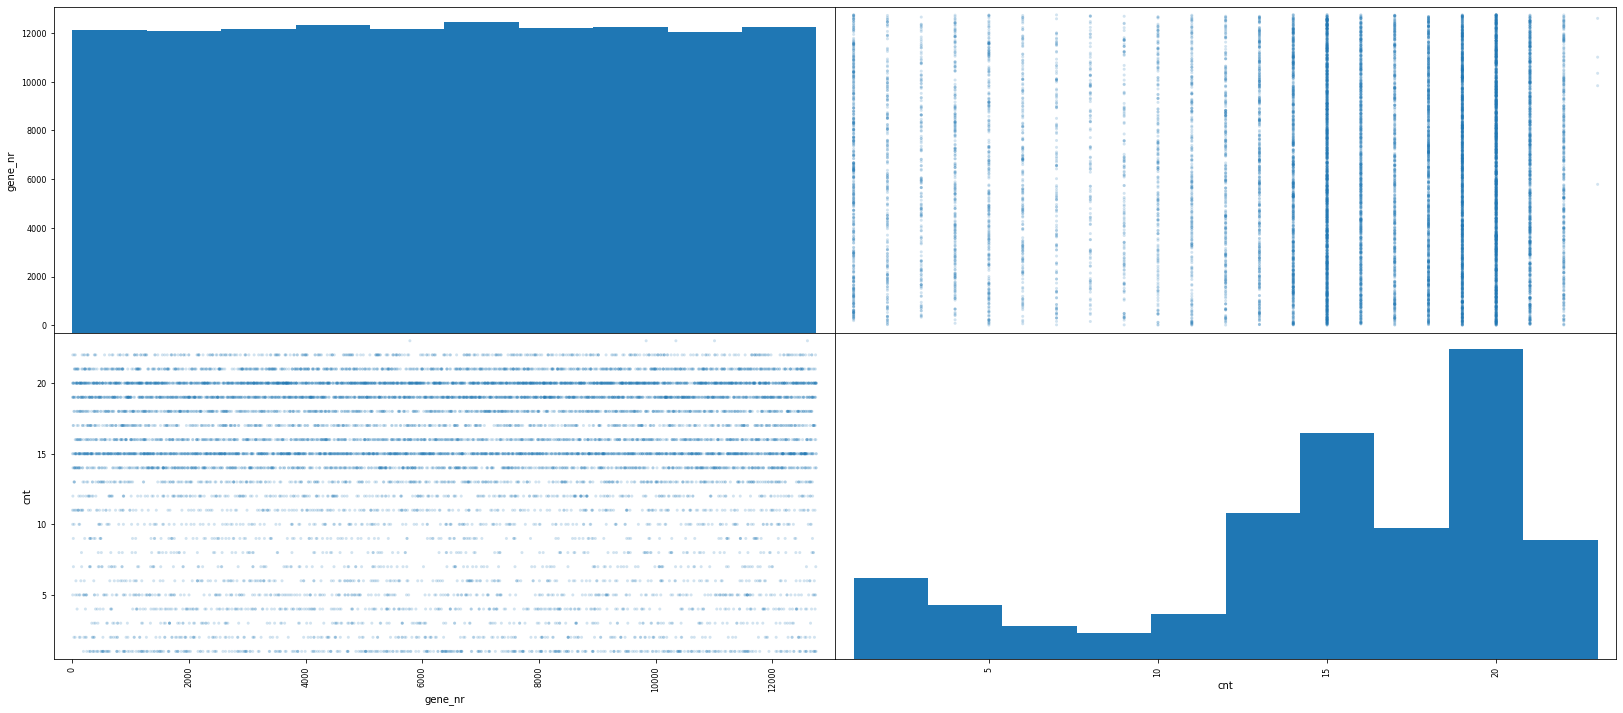

In [14]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(28.0,12.0))

In [15]:
## Gene numbers without ANY gene predictions
SQL_Query = pd.read_sql_query('''select DISTINCT(gene_nr) from genes ORDER BY gene_nr''', conn)
df = pd.DataFrame(SQL_Query, columns=['gene_nr',])
# Control
# print(df)
all_genes = range(0,12755)
missing_genes = sorted(set(all_genes) - set(df.gene_nr))
len(missing_genes)

42

In [16]:
## Gene numbers without COMPLETE gene predictions
SQL_Query = pd.read_sql_query('''select DISTINCT(gene_nr) from genes WHERE is_complete = True ORDER BY gene_nr''', conn)
df = pd.DataFrame(SQL_Query, columns=['gene_nr',])
# Control
# print(df)
all_genes = range(0,num_genes)
missing_genes = sorted(set(all_genes) - set(df.gene_nr))
len(missing_genes)

1023

<AxesSubplot:xlabel='gene_nr'>

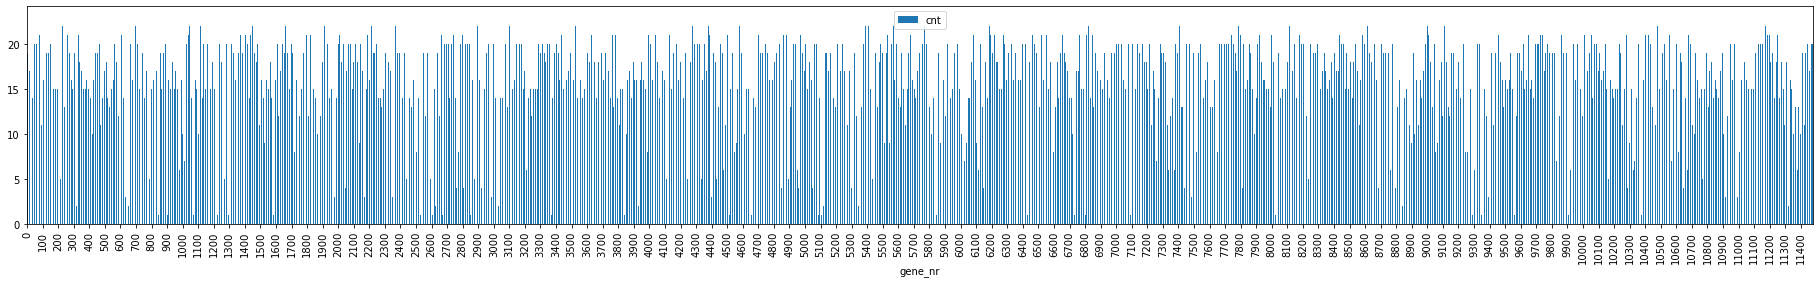

In [24]:
## Complete genes by gene number (first hit only)
SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE hit_nr = 0 and is_complete = True GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
df.plot.bar(x='gene_nr', y='cnt', xticks=range(0,len(df),100), figsize=(32.0,4.0))

In [25]:
## Job: job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae
SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
# SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' and is_complete = True GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
# SQL_Query = pd.read_sql_query('''select gene_nr, 1 as cnt from genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' and is_complete = True GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
df_sql = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
df_job = pd.DataFrame.from_dict(dict([('gene_nr', range(0, num_genes)), ('cnt', np.zeros(num_genes, dtype=int))]))
df_job.cnt[df_sql.gene_nr] = df_sql.cnt
df_job

gene_nr  cnt
0            0    3
1            1    1
2            2    1
3            3    3
4            4    3
...        ...  ...
12750    12750    2
12751    12751    0
12752    12752    1
12753    12753    1
12754    12754    1

[12755 rows x 2 columns]

<AxesSubplot:xlabel='gene_nr'>

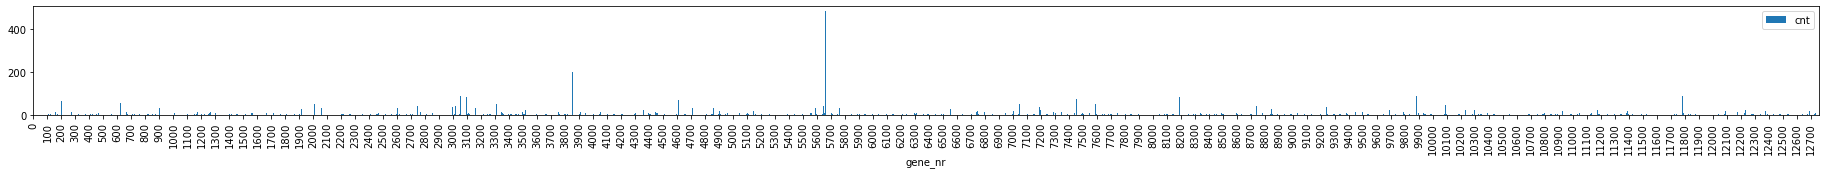

In [26]:
df_job.plot.bar(x='gene_nr', y='cnt', xticks=range(0,12755,100), figsize=(32.0,2.0))

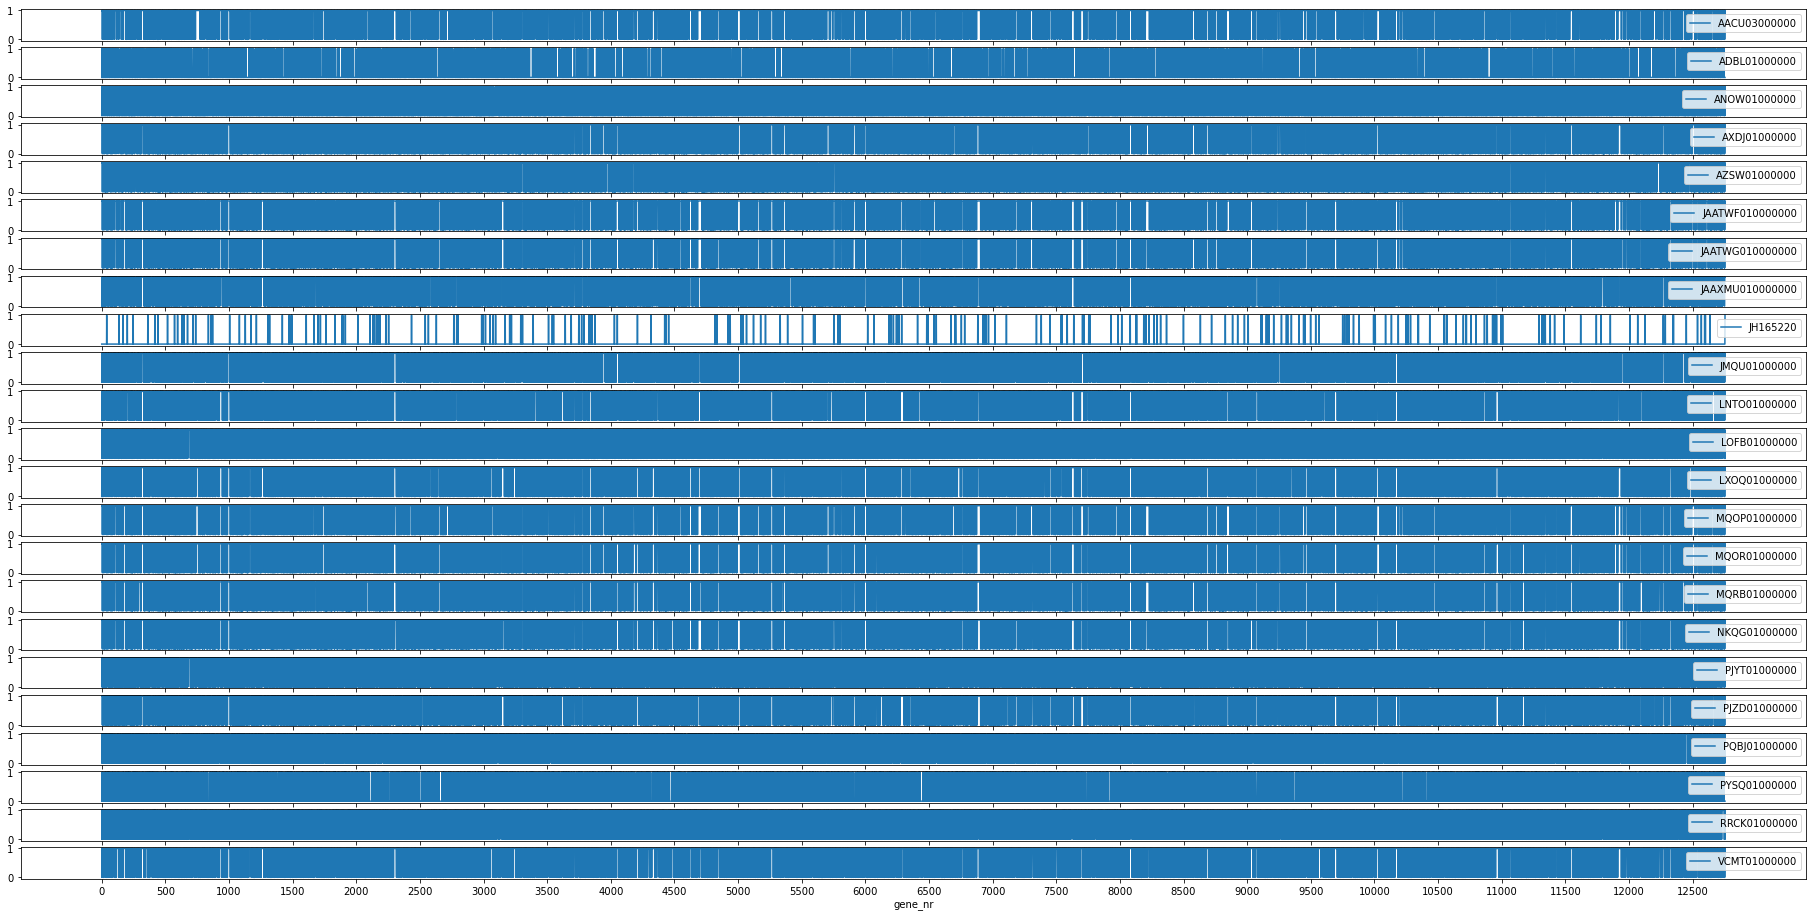

In [27]:
import matplotlib.pyplot as plt

## Create Genome Annotation BarCode Plots (Complete Genes)
SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes ORDER BY job ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['job'])
fig, axes = plt.subplots(nrows=len(df), ncols=1, sharex=True, figsize=(32.0,16.0))
for i, job in enumerate(df.job):
    m = re.search('.+_([A-Z]{2,6}[0-9]{6,11})_.+', job)
    short_job = m.group(1) if m else job
    SQL_Query = pd.read_sql_query('''select gene_nr, 1 as cnt from genes WHERE job = '%s' and is_complete = True GROUP BY gene_nr ORDER BY gene_nr ASC''' % job, conn)
    df_sql = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
    df_job = pd.DataFrame.from_dict(dict([('gene_nr', range(0, num_genes)), ('cnt', np.zeros(num_genes, dtype=int))]))
    df_job.cnt[df_sql.gene_nr] = df_sql.cnt
    ## Bar Plot
    df_job.plot(x='gene_nr', y='cnt', xticks=range(0,12755,500), ax=axes[i])
    axes[i].legend().get_texts()[0].set_text(short_job)


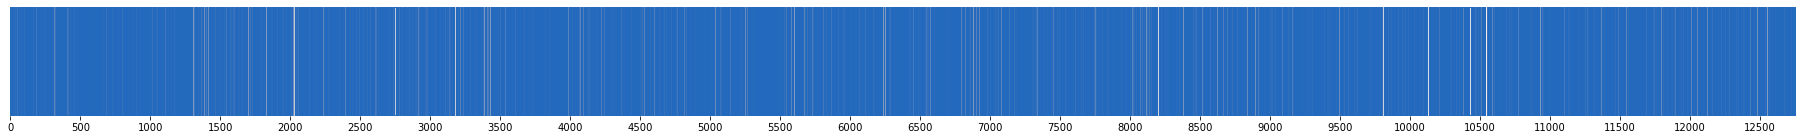

In [28]:
import seaborn as sns
## Job: job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae
SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE job = 'job_target_magnap_oryzae_AACU03000000_query_magnap_oryzae' GROUP BY gene_nr ORDER BY gene_nr ASC''', conn)
df_sql = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
df_job = pd.DataFrame.from_dict(dict([('cnt', np.zeros(num_genes, dtype=int))]))
df_job.cnt[df_sql.gene_nr] = df_sql.cnt
# Heatmap
plt.figure(figsize=(32.0,2.0))
ax = sns.heatmap(df_job.T, xticklabels=500, yticklabels=False, cmap='vlag', cbar=False)
# ax.legend(['job'], prop={'size': 48})

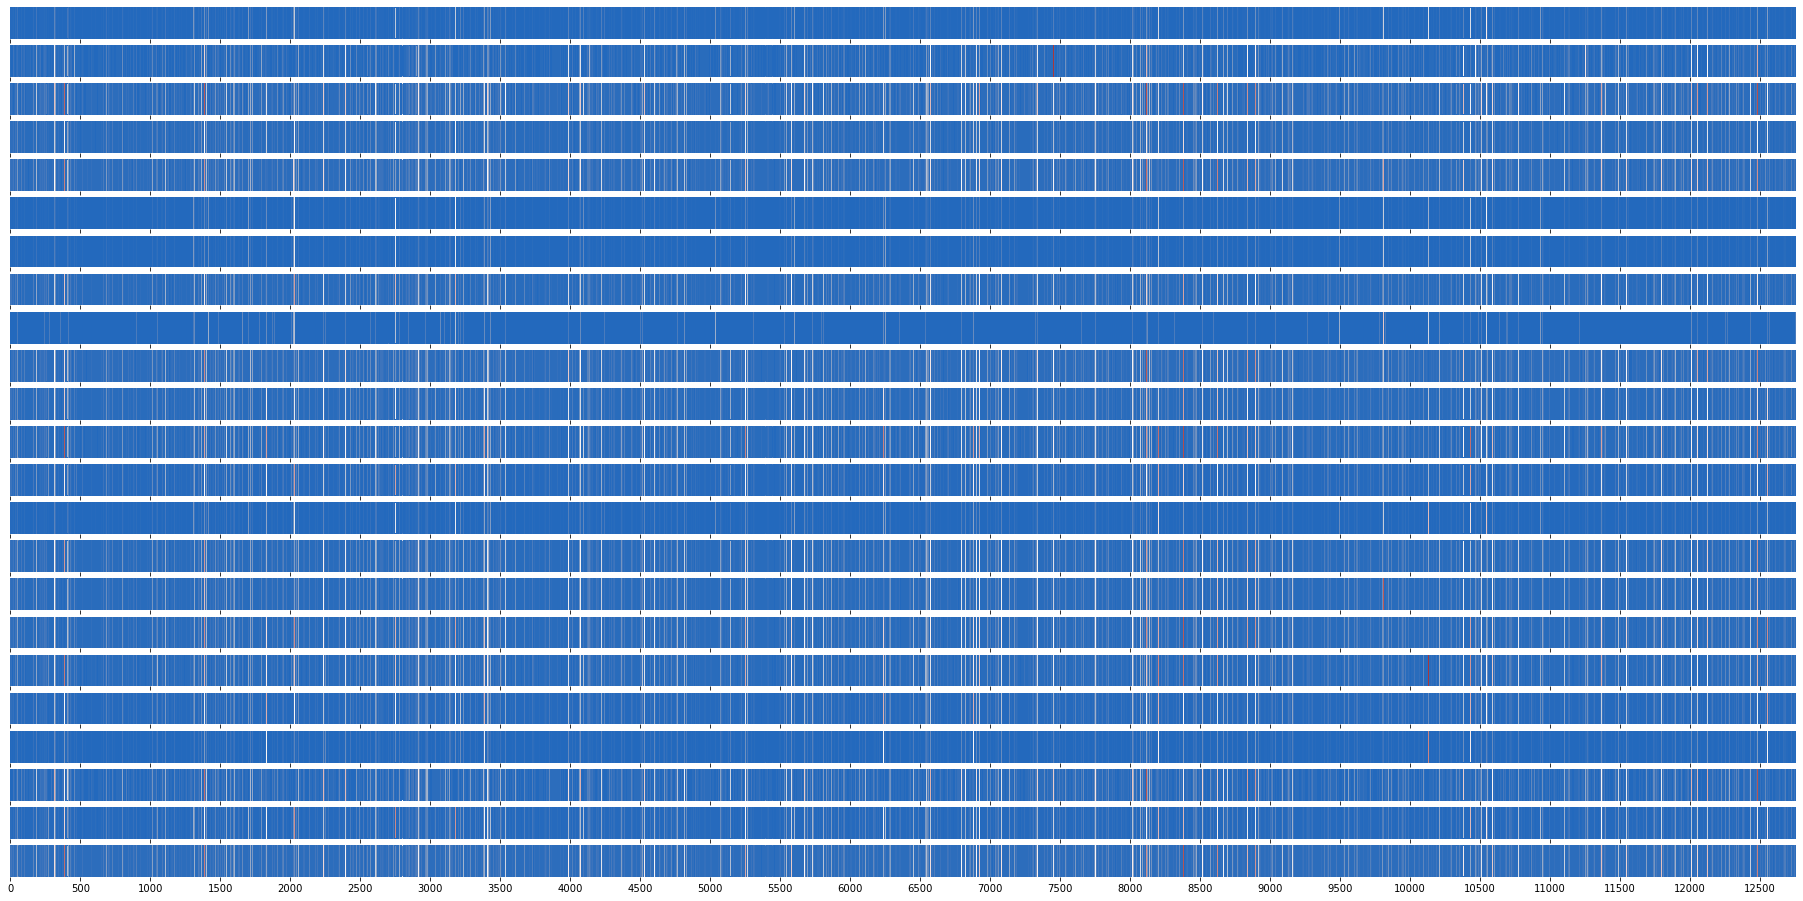

In [29]:
## Create Genome Annotation BarCode Plots (All Gene Predictions)
SQL_Query = pd.read_sql_query('''select DISTINCT(job) as job from genes ORDER BY job ASC''', conn)
df = pd.DataFrame(SQL_Query, columns=['job'])
fig, axes = plt.subplots(nrows=len(df), ncols=1, sharex=True, figsize=(32.0,16.0))
for i, job in enumerate(df.job):
    m = re.search('.+_([A-Z]{2,6}[0-9]{6,11})_.+', job)
    short_job = m.group(1) if m else job
    SQL_Query = pd.read_sql_query('''select gene_nr, COUNT(gene_nr) as cnt from genes WHERE job = '%s' GROUP BY gene_nr ORDER BY gene_nr ASC''' % job, conn)
    df_sql = pd.DataFrame(SQL_Query, columns=['gene_nr', 'cnt'])
    df_job = pd.DataFrame.from_dict(dict([('cnt', np.zeros(num_genes, dtype=int))]))
    df_job.cnt[df_sql.gene_nr] = df_sql.cnt
    ## Heatmap
    ax = sns.heatmap(df_job.T, xticklabels=500, yticklabels=False, cmap='vlag', cbar=False, ax=axes[i])
    # axes[i].legend([short_job])